### Most of the code is self explanatory

In [17]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
data=pd.read_csv('deep_learning_features.csv')
data['canonical_vendor_name'] =data['canonical_vendor_name'].replace(' ', '_', regex=True)
data['line_item_nd']=data['line_item_nd'].str.strip()
data['canonical_vendor_name']=data['canonical_vendor_name'].str.strip()
data['canonical_line_item_name_y']=data['canonical_line_item_name_y'].str.strip()
data.head()

,line_item_nd,canonical_vendor_name,canonical_line_item_name_y,Y
0,management services april #### services,##_minute_ventures,management services,1
1,june web media fee ### ### times ## percent co...,acqcom_digital_marketing,web media fee,1
2,business package,adjust,additional attributions,0
3,business package,adjust,business package,1
4,seo services,adlift,content marketing,0


In [19]:
# data=data.sample(data.shape[0])
data_f=pd.read_csv('calculated_features.csv')
data_f.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,word_Common,word_Total,word_share
0,0.999950,0.499988,0.999950,0.499988,0.999950,0.399992,1.0,1.0,3.0,3.5,100,72,66,100,0.950000,2.0,6.0,1.0
1,0.999967,0.333330,0.999967,0.333330,0.999967,0.299997,0.0,0.0,7.0,6.5,100,46,39,100,0.928571,3.0,12.0,1.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.0,26,26,26,29,0.111111,0.0,5.0,0.0
3,0.999950,0.999950,0.999950,0.999950,0.999950,0.999950,1.0,1.0,0.0,2.0,100,100,100,100,0.941176,2.0,5.0,1.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.0,28,28,28,31,0.071429,0.0,5.0,0.0


In [20]:
X_train=data.drop(['Y'], axis=1)
Y_train=data['Y']

In [21]:
all_strings = []
for k in X_train.columns:
    strings=('\n'.join(X_train[k])).split('\n')
    all_strings.extend(strings)

In [22]:
all_strings[0:5]

['management services april #### services',
 'june web media fee ### ### times ## percent commission',
 'business package',
 'business package',
 'seo services']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_val, X_train_f, X_eval_f, Y_train, Y_val = train_test_split(X_train, data_f, Y_train, test_size=0.2, stratify=Y_train)

In [24]:
X_train.shape, X_train_f.shape, Y_train.shape, X_val.shape, X_eval_f.shape, Y_val.shape

((9671, 3), (9671, 18), (9671,), (2418, 3), (2418, 18), (2418,))

In [25]:
t = Tokenizer()
t.fit_on_texts(all_strings)

In [26]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(t, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [27]:
lengths_x=(X_train['line_item_nd'].str.split().apply(len)).values
lengths_y=(X_train['canonical_line_item_name_y'].str.split().apply(len)).values
lengths_ven=(X_train['canonical_vendor_name'].str.split('_').apply(len)).values

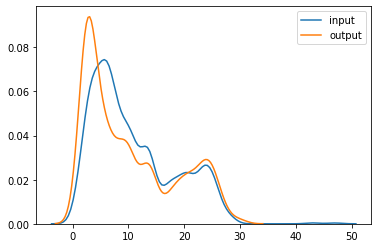

In [28]:
sns.kdeplot(lengths_x, label="input")
sns.kdeplot(lengths_y, label="output")
# sns.kdeplot(lengths_ven, label="vendor")
plt.show()

In [29]:
print(np.argmax(lengths_x), X_train.iloc[np.argmax(lengths_x)])
print(np.argmax(lengths_y), X_train.iloc[np.argmax(lengths_y)])
print(np.argmax(lengths_ven), X_train.iloc[np.argmax(lengths_ven)])
for i in range(0, 101, 10):
    print(i, np.percentile(lengths_x, i), np.percentile(lengths_y, i), np.percentile(lengths_ven, i))

284 line_item_nd                  lenovo thinkpad x# carbon #th gen ##qd ultrabo...
canonical_vendor_name                                              sti_products
canonical_line_item_name_y    barracuda sentinel for office ### subscription...
Name: 9938, dtype: object
92 line_item_nd                  apple ipad ##gb retina display wifi bluetooth ...
canonical_vendor_name                                           amazon_business
canonical_line_item_name_y    tilting tv wall mount bracket low profile for ...
Name: 1788, dtype: object
0 line_item_nd                  olivia api api workload
canonical_vendor_name              xiamen_zhizhi_tech
canonical_line_item_name_y                 web carter
Name: 11369, dtype: object
0 0.0 1.0 1.0
10 3.0 2.0 1.0
20 4.0 3.0 2.0
30 6.0 4.0 2.0
40 7.0 6.0 2.0
50 9.0 8.0 2.0
60 11.0 10.0 2.0
70 14.0 14.0 2.0
80 19.0 20.0 2.0
90 23.0 24.0 3.0
100 47.0 30.0 3.0


In [30]:
for i in range(90, 101, 1):
    print(i, np.percentile(lengths_x, i), np.percentile(lengths_y, i), np.percentile(lengths_ven, i))

90 23.0 24.0 3.0
91 23.0 24.0 3.0
92 24.0 24.0 3.0
93 24.0 25.0 3.0
94 24.0 25.0 3.0
95 25.0 25.0 3.0
96 25.0 25.0 3.0
97 26.0 26.0 3.0
98 26.0 26.0 3.0
99 28.0 28.0 3.0
100 47.0 30.0 3.0


In [31]:
name_description_train = t.texts_to_sequences(X_train['line_item_nd'], )
name_description_train = pad_sequences(name_description_train, maxlen=25,padding='post')
print("input dimes",name_description_train.shape)
output_train = t.texts_to_sequences(X_train['canonical_line_item_name_y'])
output_train = pad_sequences(output_train, maxlen=25,padding='post')
print("link item",output_train.shape)
#====================
name_description_eval = t.texts_to_sequences(X_val['line_item_nd'])
name_description_eval = pad_sequences(name_description_eval, maxlen=25,padding='post')
print("input dimes",name_description_train.shape)
output_eval = t.texts_to_sequences(X_val['canonical_line_item_name_y'])
output_eval = pad_sequences(output_eval, maxlen=25,padding='post')
print("link item",output_eval.shape)
#====================


input dimes (9671, 25)
link item (9671, 25)
input dimes (9671, 25)
link item (2418, 25)


In [15]:
# !wget http://nlp.stanford.edu/data/glove.42B.300d.zip
# !unzip glove.42B.300d.zip

In [16]:
vocab = set(dict(t.word_index.items()).keys())

In [17]:
vocab_size = len(t.word_index) + 1

In [18]:
embeddings_index = {}
with open('glove.42B.300d.txt', 'r') as f:
    for line in f:
        values = line.split()
        word  = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        if word in vocab:
            embeddings_index[word] = coefs

print('Found word vectors ', len(embeddings_index), "out of", vocab_size)
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Found word vectors  1715 out of 1780


In [20]:
vendor_names_train = t.texts_to_sequences(X_train['canonical_vendor_name'])
vendor_names_train = pad_sequences(vendor_names_train, maxlen=3,padding='post')
print("link item",vendor_names_train.shape)
#================
vendor_names_eval = t.texts_to_sequences(X_val['canonical_vendor_name'])
vendor_names_eval = pad_sequences(vendor_names_eval, maxlen=3,padding='post')
print("link item",vendor_names_eval.shape)

link item (9671, 3)
link item (2418, 3)


In [32]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dot, Dense, Concatenate
from tensorflow.keras.models import Model

In [22]:
tf.unique([1, 3, 1, 4])[0].shape==3

True

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
def auroc(y_true, y_pred):
    y_true= tf.reshape(y_true, shape=(-1,))
    if tf.unique(y_true)[0].shape[0]==1:
        print(tf.unique(y_true)[0].shape, "hello")
        return 0.5
    else:
        return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

### Inspired by Siamese neural network

In [24]:
input1= Input(shape=(25,))
emb1 = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(input1)
lstm_out1 = LSTM(100)(emb1)

input2= Input(shape=(25,))
emb2 = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(input2)
lstm_out2 = LSTM(100)(emb2)

similarity = Dot(axes=(1))([lstm_out1, lstm_out2])

input3 = Input(shape=(18,))

concat = Concatenate(axis=-1)([similarity, input3])

is_link = Dense(1, activation='sigmoid')(concat)


model = Model(inputs=[input1, input2, input3], outputs=is_link)
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy', auroc])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 25)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 25)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 25, 300)      534000      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 25, 300)      534000      input_2[0][0]                    
______________________________________________________________________________________________

In [25]:
model.fit([name_description_train,output_train, X_train_f],Y_train, epochs=20, batch_size=1024, validation_data=([name_description_eval, output_eval, X_eval_f],Y_val))

Epoch 1/20
10/10 [==============================] - 10s 995ms/step - loss: 2.0024 - accuracy: 0.9341 - auroc: 0.2160 - val_loss: 2.0745 - val_accuracy: 0.9260 - val_auroc: 0.1692
Epoch 2/20
10/10 [==============================] - 9s 914ms/step - loss: 1.8914 - accuracy: 0.9276 - auroc: 0.2279 - val_loss: 1.8879 - val_accuracy: 0.9144 - val_auroc: 0.1562
Epoch 3/20
10/10 [==============================] - 9s 911ms/step - loss: 1.6692 - accuracy: 0.9190 - auroc: 0.2307 - val_loss: 1.6924 - val_accuracy: 0.8954 - val_auroc: 0.2089
Epoch 4/20
10/10 [==============================] - 9s 920ms/step - loss: 1.5513 - accuracy: 0.9056 - auroc: 0.2791 - val_loss: 1.5889 - val_accuracy: 0.9127 - val_auroc: 0.2436
Epoch 5/20
10/10 [==============================] - 9s 920ms/step - loss: 1.4554 - accuracy: 0.9161 - auroc: 0.2816 - val_loss: 1.5114 - val_accuracy: 0.9086 - val_auroc: 0.2675
Epoch 6/20
10/10 [==============================] - 9s 922ms/step - loss: 1.3662 - accuracy: 0.9198 - auroc: 

In [26]:
model.fit([name_description_train,output_train, X_train_f],Y_train, epochs=20, batch_size=1024, validation_data=([name_description_eval, output_eval, X_eval_f],Y_val))

Epoch 1/20
10/10 [==============================] - 9s 928ms/step - loss: 0.5167 - accuracy: 0.9344 - auroc: 0.6045 - val_loss: 0.5151 - val_accuracy: 0.9342 - val_auroc: 0.6275
Epoch 2/20
10/10 [==============================] - 9s 920ms/step - loss: 0.4754 - accuracy: 0.9342 - auroc: 0.6459 - val_loss: 0.4692 - val_accuracy: 0.9347 - val_auroc: 0.6703
Epoch 3/20
10/10 [==============================] - 9s 918ms/step - loss: 0.4301 - accuracy: 0.9355 - auroc: 0.6804 - val_loss: 0.4233 - val_accuracy: 0.9351 - val_auroc: 0.7119
Epoch 4/20
10/10 [==============================] - 9s 924ms/step - loss: 0.3893 - accuracy: 0.9384 - auroc: 0.7162 - val_loss: 0.3894 - val_accuracy: 0.9376 - val_auroc: 0.7447
Epoch 5/20
10/10 [==============================] - 9s 921ms/step - loss: 0.3545 - accuracy: 0.9430 - auroc: 0.7405 - val_loss: 0.3522 - val_accuracy: 0.9479 - val_auroc: 0.7657
Epoch 6/20
10/10 [==============================] - 9s 926ms/step - loss: 0.3205 - accuracy: 0.9461 - auroc: 0

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("weights{epoch:02d}.h5", monitor='val_auroc', verbose=1, save_best_only=True)

model.fit([name_description_train,output_train, X_train_f],Y_train, epochs=20, batch_size=1024, validation_data=([name_description_eval, output_eval, X_eval_f],Y_val),\
            callbacks=[checkpoint]          
          )

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 0.1272 - accuracy: 0.9751 - auroc: 0.9402
Epoch 00001: val_auroc improved from inf to 0.94500, saving model to weights01.h5
10/10 [==============================] - 9s 933ms/step - loss: 0.1272 - accuracy: 0.9751 - auroc: 0.9402 - val_loss: 0.1564 - val_accuracy: 0.9669 - val_auroc: 0.9450
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 0.1253 - accuracy: 0.9740 - auroc: 0.9452
Epoch 00002: val_auroc did not improve from 0.94500
10/10 [==============================] - 9s 922ms/step - loss: 0.1253 - accuracy: 0.9740 - auroc: 0.9452 - val_loss: 0.1530 - val_accuracy: 0.9698 - val_auroc: 0.9481
Epoch 3/20
10/10 [==============================] - ETA: 0s - loss: 0.1247 - accuracy: 0.9760 - auroc: 0.9481
Epoch 00003: val_auroc did not improve from 0.94500
10/10 [==============================] - 9s 923ms/step - loss: 0.1247 - accuracy: 0.9760 - auroc: 0.9481 - val_loss: 0.1470 - val_accuracy: 0.9661 - v

In [2]:
# the model is not overfitting and decent metric, here i have taken AUC as metric
# went to AUC from f1 score, cause the f1 score concentrates more on positive class, if the business need insists we have to use F1 sore only

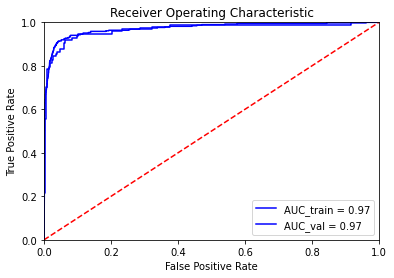

In [41]:
loaded_model=tf.keras.models.load_model('auc_0_9713.h5', custom_objects={'auroc': auroc})
y_train_pred = loaded_model.predict([name_description_train,output_train, X_train_f])
y_eval_pred = loaded_model.predict([name_description_eval, output_eval, X_eval_f])

tfpr, ttpr, tthreshold = roc_curve(Y_train, y_train_pred)
troc_auc = auc(tfpr, ttpr)
efpr, etpr, ethreshold = roc_curve(Y_val, y_eval_pred)
eroc_auc = auc(efpr, etpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(tfpr, ttpr, 'b', label = 'AUC_train = %0.2f' % troc_auc)
plt.plot(efpr, etpr, 'b', label = 'AUC_val = %0.2f' % eroc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [51]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=0.014:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [52]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tthreshold, tfpr, ttpr)
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(Y_val, predict_with_best_t(y_eval_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.874595774007327 for threshold 0.014
Train confusion matrix
[[8905  380]
 [  36  350]]
Test confusion matrix
[[2226   95]
 [  13   84]]
